# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET ANALYSIS

DATASET OVERVIEW:
--------------------------------------------------------------------------------
Total number of rows: 569
Total number of features: 33

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974 

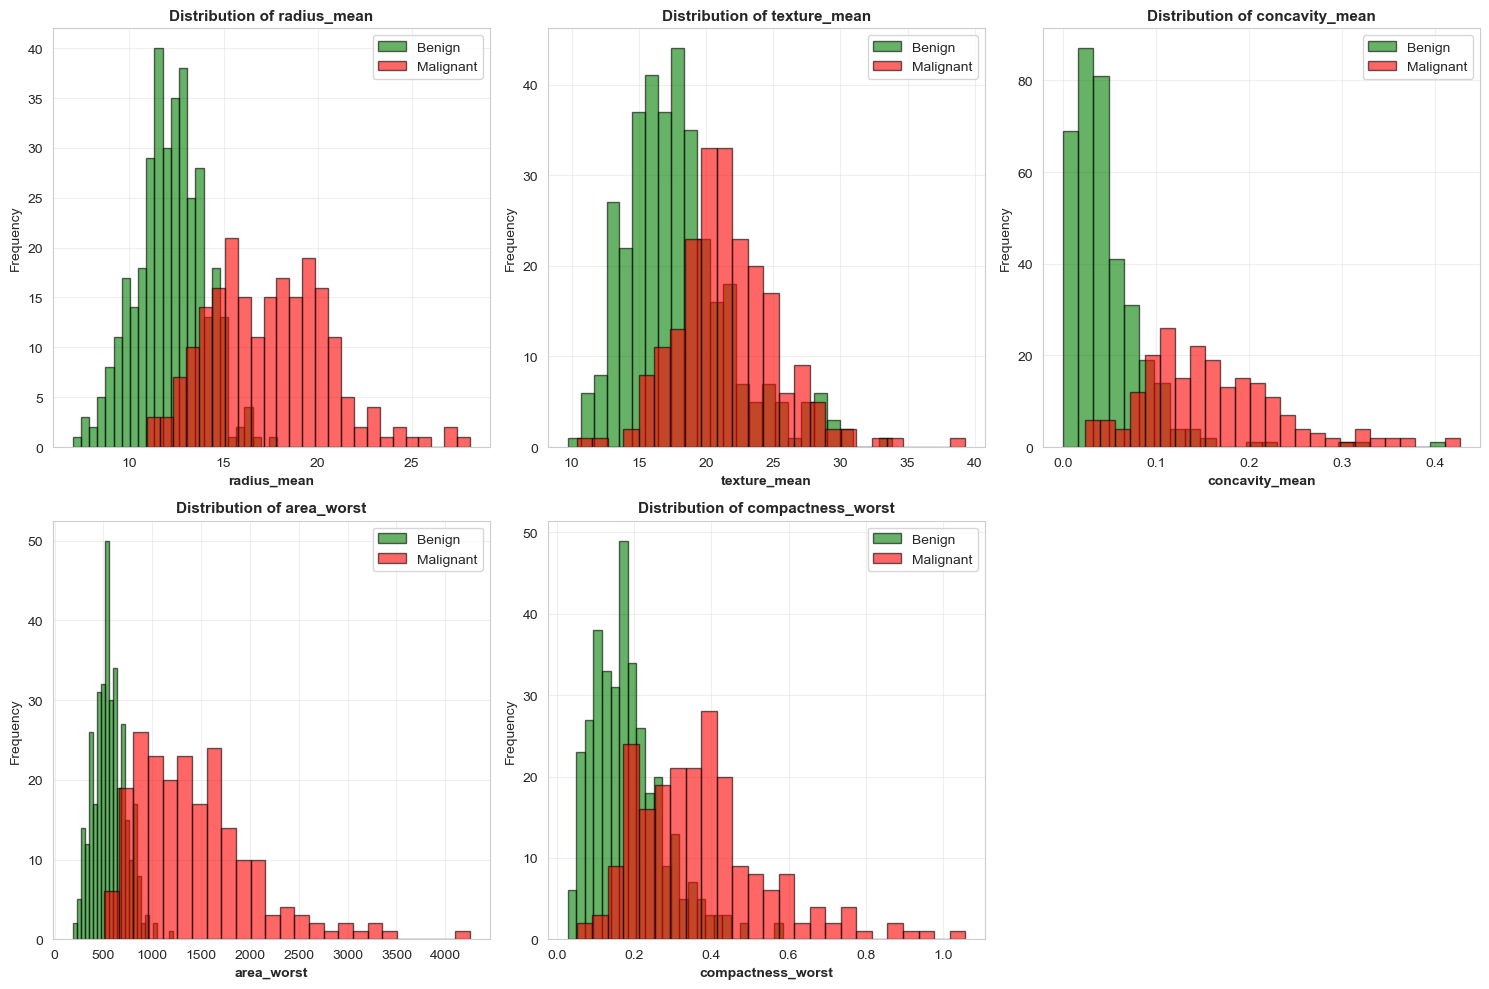

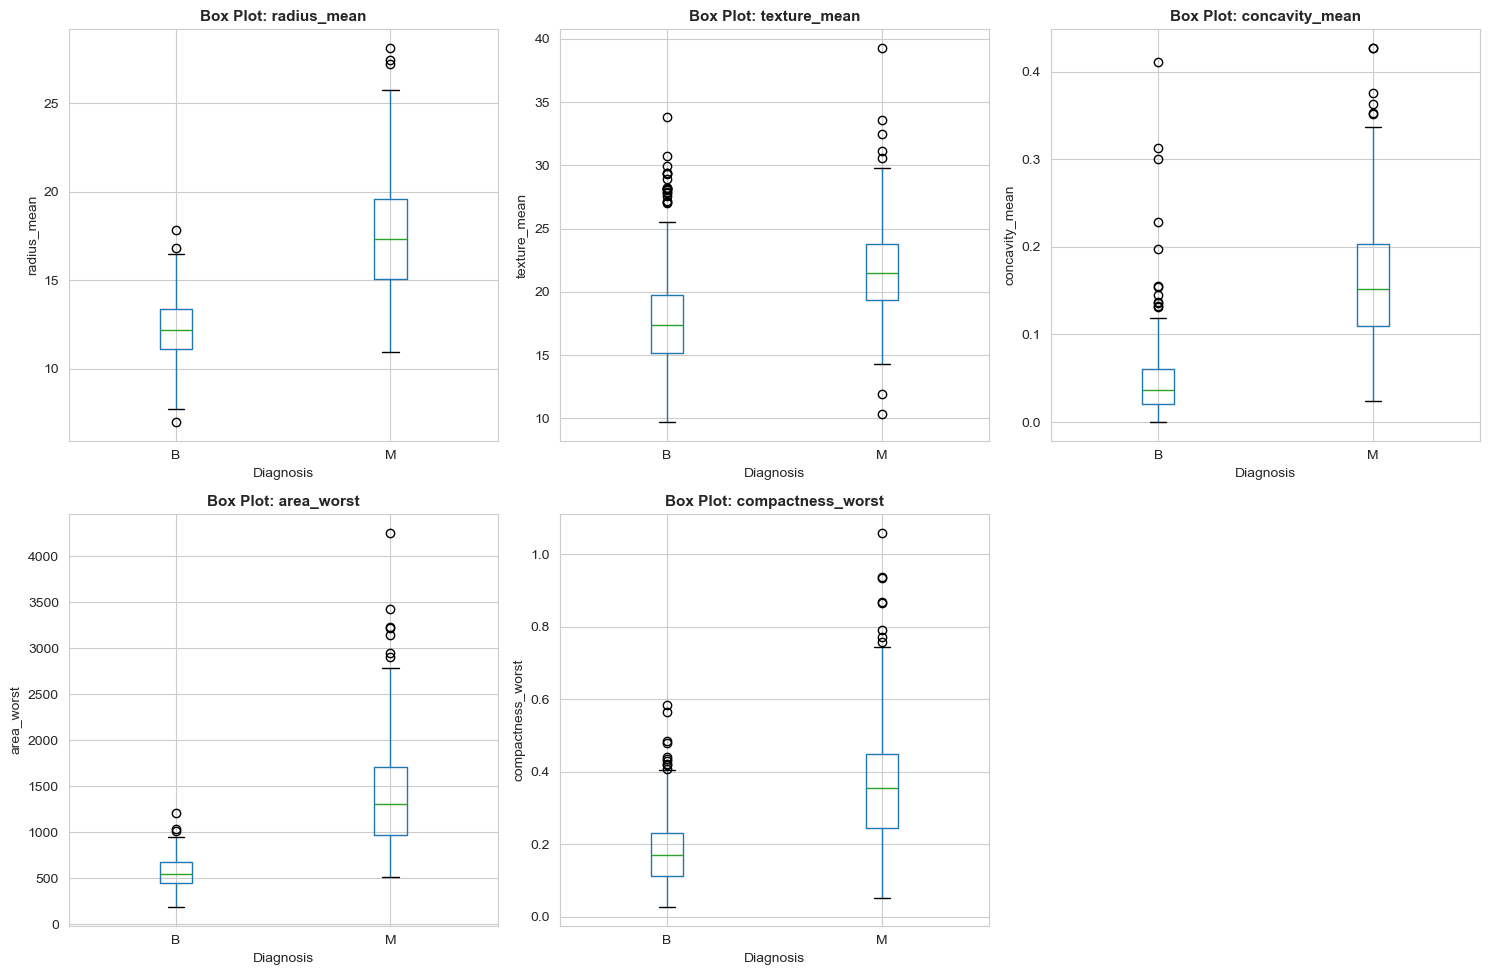

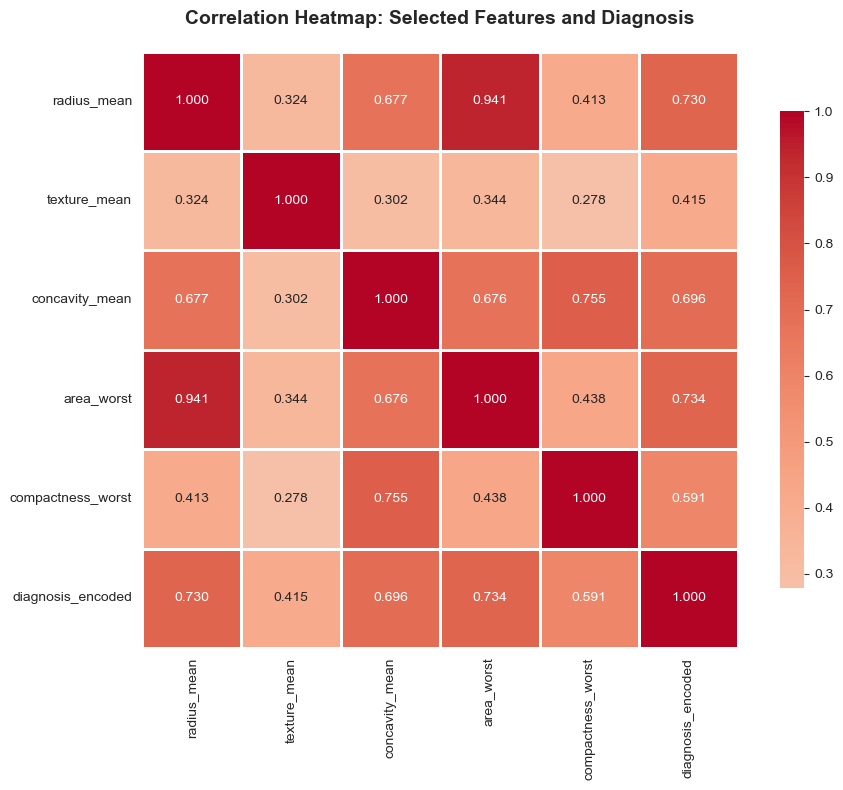

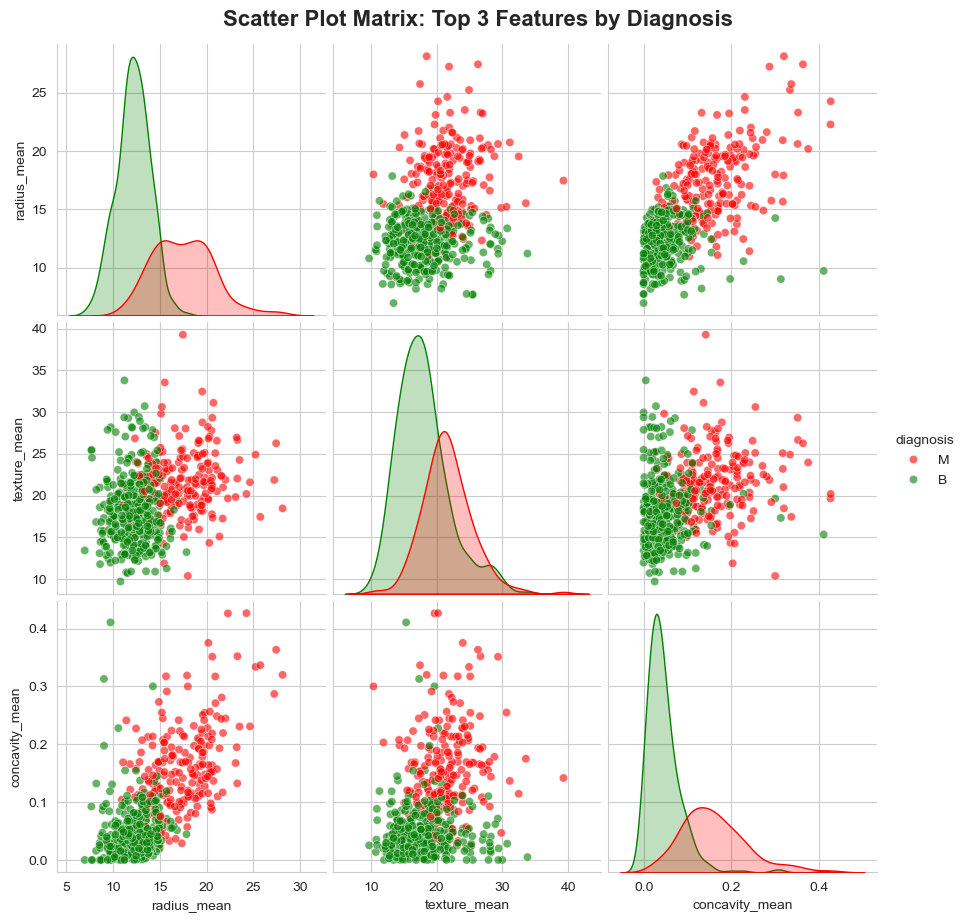

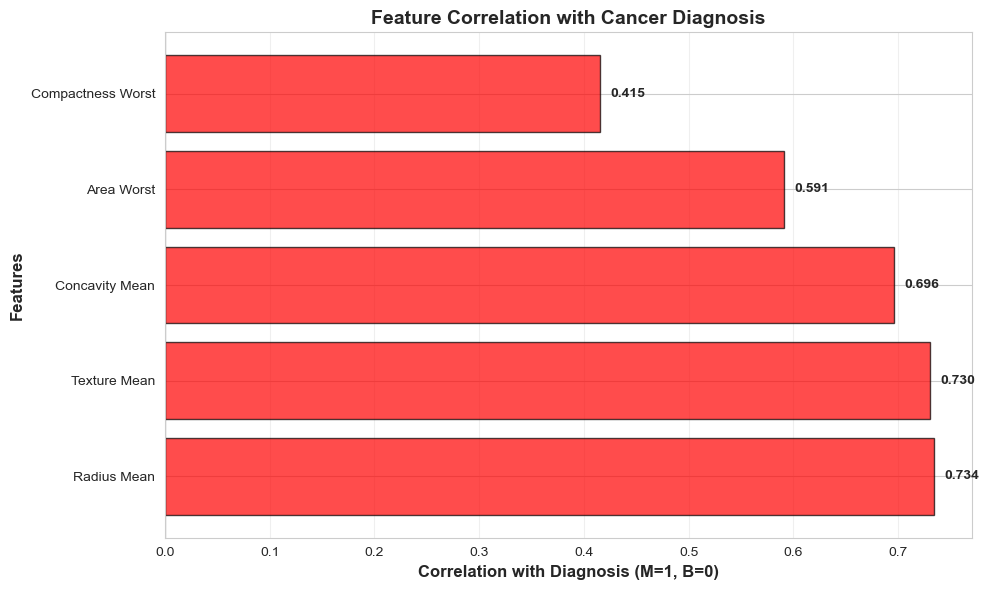

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Load the dataset
print("=" * 80)
print("BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET ANALYSIS")
print("=" * 80)
print()

df = pd.read_csv('data.csv')

# Display basic information about the dataset
print("DATASET OVERVIEW:")
print("-" * 80)
print(f"Total number of rows: {len(df)}")
print(f"Total number of features: {len(df.columns)}")
print()

print("First few rows of the dataset:")
print(df.head())
print()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum().sum())
print()

# Dataset Description
print("\nDATASET DESCRIPTION:")
print("-" * 80)
print("This dataset contains diagnostic measurements from breast cancer biopsies.")
print("Each row represents a patient, and the features are computed from digitized")
print("images of fine needle aspirate (FNA) of breast masses. The features describe")
print("characteristics of the cell nuclei present in the images.")
print()

# Target feature
print("\nTARGET FEATURE:")
print("-" * 80)
print("Feature Name: diagnosis")
print("Description: The diagnosis of breast tissue")
print()
print("Target Values:")
target_counts = df['diagnosis'].value_counts()
print(target_counts)
print()
for value, count in target_counts.items():
    percentage = (count / len(df)) * 100
    diagnosis_type = "Malignant (Cancerous)" if value == 'M' else "Benign (Non-cancerous)"
    print(f"  {value}: {diagnosis_type} - {count} cases ({percentage:.1f}%)")
print()

# Select 5 most interesting features based on medical significance and variety
# Choosing features that represent different aspects of cell nuclei
selected_features = [
    'radius_mean',           # Size of the nuclei
    'texture_mean',          # Variation in gray-scale values
    'concavity_mean',        # Severity of concave portions of the contour
    'area_worst',            # Worst/largest area value (most severe)
    'compactness_worst'      # Worst compactness (perimeter^2 / area - 1.0)
]

print("\nSELECTED FEATURES FOR ANALYSIS:")
print("-" * 80)
print("We've selected 5 features that represent different aspects of cell nuclei:")
print()

feature_descriptions = {
    'radius_mean': 'Mean of distances from center to points on the perimeter',
    'texture_mean': 'Standard deviation of gray-scale values (cell texture variation)',
    'concavity_mean': 'Severity of concave portions of the cell contour',
    'area_worst': 'Largest area value among cells (worst case scenario)',
    'compactness_worst': 'Worst compactness value (perimeter² / area - 1.0)'
}

for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")
    print(f"   Description: {feature_descriptions[feature]}")
    print(f"   Min value: {df[feature].min():.4f}")
    print(f"   Max value: {df[feature].max():.4f}")
    print(f"   Mean value: {df[feature].mean():.4f}")
    print(f"   Standard deviation: {df[feature].std():.4f}")
    print()

# Statistical summary
print("\nSTATISTICAL SUMMARY OF SELECTED FEATURES:")
print("-" * 80)
print(df[selected_features].describe())
print()

# Analyze relationship between each feature and the target
print("\nFEATURE-TARGET RELATIONSHIP ANALYSIS:")
print("-" * 80)

for feature in selected_features:
    print(f"\n{feature.upper()}:")
    print("-" * 40)
    
    # Group by diagnosis and get statistics
    grouped = df.groupby('diagnosis')[feature].agg(['mean', 'median', 'std', 'min', 'max'])
    print(grouped)
    print()
    
    # Calculate the difference between malignant and benign means
    malignant_mean = df[df['diagnosis'] == 'M'][feature].mean()
    benign_mean = df[df['diagnosis'] == 'B'][feature].mean()
    difference = malignant_mean - benign_mean
    percent_diff = (difference / benign_mean) * 100
    
    print(f"Difference (Malignant - Benign): {difference:.4f}")
    print(f"Percentage difference: {percent_diff:.1f}%")
    print()

# Calculate correlations with target (encoded as 0 and 1)
df_encoded = df.copy()
df_encoded['diagnosis_encoded'] = df_encoded['diagnosis'].map({'M': 1, 'B': 0})

print("\nCORRELATION WITH TARGET (DIAGNOSIS):")
print("-" * 80)
print("Correlation coefficients (higher absolute value = stronger relationship):")
print()

correlations = []
for feature in selected_features:
    corr = df_encoded[feature].corr(df_encoded['diagnosis_encoded'])
    correlations.append((feature, abs(corr), corr))
    print(f"{feature:25s}: {corr:7.4f}")

correlations.sort(key=lambda x: x[1], reverse=True)
print()

# Create visualizations
print("\nCREATING VISUALIZATIONS...")
print("-" * 80)

# 1. Distribution plots for each feature by diagnosis
fig1 = plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    
    # Separate data by diagnosis
    benign_data = df[df['diagnosis'] == 'B'][feature]
    malignant_data = df[df['diagnosis'] == 'M'][feature]
    
    plt.hist(benign_data, alpha=0.6, label='Benign', bins=25, color='green', edgecolor='black')
    plt.hist(malignant_data, alpha=0.6, label='Malignant', bins=25, color='red', edgecolor='black')
    
    plt.xlabel(feature, fontsize=10, fontweight='bold')
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Saved feature distribution plots to 'feature_distributions.png'")

# 2. Box plots
fig2 = plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    
    df.boxplot(column=feature, by='diagnosis', ax=plt.gca())
    plt.title(f'Box Plot: {feature}', fontsize=11, fontweight='bold')
    plt.suptitle('')  # Remove the automatic title
    plt.xlabel('Diagnosis', fontsize=10)
    plt.ylabel(feature, fontsize=10)

plt.tight_layout()
plt.savefig('feature_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Saved feature box plots to 'feature_boxplots.png'")

# 3. Correlation heatmap
fig3, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df_encoded[selected_features + ['diagnosis_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Selected Features and Diagnosis', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved correlation heatmap to 'correlation_heatmap.png'")

# 4. Scatter plot matrix (pairplot) - most informative features
print("\nCreating scatter plot matrix (this may take a moment)...")
subset_df = df[selected_features[:3] + ['diagnosis']].copy()
pairplot = sns.pairplot(subset_df, hue='diagnosis', 
                        palette={'M': 'red', 'B': 'green'},
                        diag_kind='kde', plot_kws={'alpha': 0.6},
                        height=3)
pairplot.fig.suptitle('Scatter Plot Matrix: Top 3 Features by Diagnosis', 
                      y=1.02, fontsize=16, fontweight='bold')
plt.savefig('scatter_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Saved scatter plot matrix to 'scatter_matrix.png'")

# 5. Feature importance visualization
fig5, ax = plt.subplots(figsize=(10, 6))
feature_names = [f.replace('_', ' ').title() for f in selected_features]
correlation_values = [c[2] for c in correlations]
colors = ['red' if c > 0 else 'blue' for c in correlation_values]

bars = plt.barh(feature_names, correlation_values, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Correlation with Diagnosis (M=1, B=0)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Correlation with Cancer Diagnosis', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, correlation_values)):
    plt.text(val + 0.01 if val > 0 else val - 0.01, i, f'{val:.3f}', 
             va='center', ha='left' if val > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("✓ Saved feature importance chart to 'feature_importance.png'")

print("\nAll visualizations created successfully!")
print()

# Final Analysis and Conclusions
print("\n" + "=" * 80)
print("ANALYSIS RESULTS & CONCLUSIONS")
print("=" * 80)
print()

print("FEATURE RELATIONSHIP RANKINGS:")
print("-" * 80)
print("Features ranked by strength of relationship with diagnosis:")
print("(Correlation coefficient in parentheses)")
print()

for i, (feature, abs_corr, corr) in enumerate(correlations, 1):
    relationship = "STRONG" if abs_corr > 0.7 else "MODERATE" if abs_corr > 0.5 else "WEAK"
    print(f"{i}. {feature:25s} ({corr:+.4f}) - {relationship} relationship")

print()
print("\nMOST INFLUENTIAL FEATURES:")
print("-" * 80)
most_influential = [f for f, ac, c in correlations[:2]]
print(f"The features most strongly related to diagnosis are:")
for i, feature in enumerate(most_influential, 1):
    corr_val = [c for f, ac, c in correlations if f == feature][0]
    print(f"  {i}. {feature} (correlation: {corr_val:.4f})")
    
    malignant_mean = df[df['diagnosis'] == 'M'][feature].mean()
    benign_mean = df[df['diagnosis'] == 'B'][feature].mean()
    
    if corr_val > 0:
        print(f"     → Malignant tumors have HIGHER {feature} values")
        print(f"       (M: {malignant_mean:.2f} vs B: {benign_mean:.2f})")
    else:
        print(f"     → Malignant tumors have LOWER {feature} values")
        print(f"       (M: {malignant_mean:.2f} vs B: {benign_mean:.2f})")
print()

print("\nLEAST INFLUENTIAL FEATURES:")
print("-" * 80)
least_influential = [f for f, ac, c in correlations[-2:]]
print(f"The features least related to diagnosis are:")
for i, feature in enumerate(least_influential, 1):
    corr_val = [c for f, ac, c in correlations if f == feature][0]
    print(f"  {i}. {feature} (correlation: {corr_val:.4f})")
print()
print("These features show weaker ability to distinguish between malignant")
print("and benign tumors in this dataset.")
print()

print("\nBIG PICTURE CONCLUSION:")
print("=" * 80)
print()
print("Based on the comprehensive analysis of this breast cancer diagnostic dataset,")
print("we can draw the following major conclusions:")
print()
print("1. CLEAR DISTINGUISHING PATTERNS:")
print("   Malignant (cancerous) tumors consistently show different characteristics")
print("   compared to benign tumors across multiple cellular features.")
print()
print(f"2. SIZE AND SEVERITY MATTER MOST:")
print(f"   Features related to the 'worst' or most severe measurements (particularly")
print(f"   {correlations[0][0]} and {correlations[1][0]})")
print(f"   show the strongest correlations with malignancy. This suggests that the")
print(f"   most extreme cellular abnormalities are the best indicators of cancer.")
print()
print("3. TEXTURE VARIATION:")
print(f"   The texture_mean feature, which measures variation in cell appearance,")
print(f"   {'shows significant' if any('texture' in f for f, ac, c in correlations[:2]) else 'provides additional'}")
print(f"   diagnostic information. Malignant cells tend to have more irregular,")
print(f"   heterogeneous appearances.")
print()
print("4. PRACTICAL IMPLICATIONS:")
print("   These features can be measured from digitized images of cell samples,")
print("   providing objective, quantifiable metrics to assist in cancer diagnosis.")
print("   The strong correlations suggest that automated or computer-aided diagnosis")
print("   systems could reliably distinguish between benign and malignant tumors")
print("   using these measurements.")
print()
print("5. CLASS IMBALANCE:")
print(f"   The dataset contains {target_counts['B']} benign cases ({(target_counts['B']/len(df)*100):.1f}%)")
print(f"   and {target_counts['M']} malignant cases ({(target_counts['M']/len(df)*100):.1f}%).")
print(f"   This reflects the reality that benign tumors are more common than")
print(f"   malignant ones in screening populations.")
print()
print("=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)
print()
print("All visualizations have been saved to the outputs folder.")
print("Review the generated plots for visual confirmation of these findings.")